# Part 0: Reading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from statsmodels.tsa.api import ExponentialSmoothing, ARIMA
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("unemployment_analysis.csv")
df.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.8 lacs,7.84 lacs,7.85 lacs,7.84 lacs,7.83 lacs,7.84 lacs,7.86 lacs,7.81 lacs,...,6.56 lacs,6.45 lacs,6.41 lacs,6.49 lacs,6.61 lacs,6.71 lacs,6.73 lacs,6.91 lacs,7.56 lacs,8.11 lacs
1,Afghanistan,AFG,10.65 lacs,10.82 lacs,10.72 lacs,10.73 lacs,11.18 lacs,10.96 lacs,10.78 lacs,10.8 lacs,...,11.34 lacs,11.19 lacs,11.14 lacs,11.13 lacs,11.16 lacs,11.18 lacs,11.15 lacs,11.22 lacs,11.71 lacs,13.28 lacs
2,Africa Western and Central,AFW,4.42 lacs,4.53 lacs,4.55 lacs,4.54 lacs,4.53 lacs,4.57 lacs,4.6 lacs,4.66 lacs,...,4.64 lacs,4.41 lacs,4.69 lacs,4.63 lacs,5.57 lacs,6.02 lacs,6.04 lacs,6.06 lacs,6.77 lacs,6.84 lacs
3,Angola,AGO,4.21 lacs,4.21 lacs,4.23 lacs,4.16 lacs,4.11 lacs,4.1 lacs,4.09 lacs,4.07 lacs,...,7.35 lacs,7.37 lacs,7.37 lacs,7.39 lacs,7.41 lacs,7.41 lacs,7.42 lacs,7.42 lacs,8.33 lacs,8.53 lacs
4,Albania,ALB,10.31 lacs,30.01 lacs,25.26 lacs,20.84 lacs,14.61 lacs,13.93 lacs,16.88 lacs,20.05 lacs,...,13.38 lacs,15.87 lacs,18.05 lacs,17.19 lacs,15.42 lacs,13.62 lacs,12.3 lacs,11.47 lacs,13.33 lacs,11.82 lacs


In [3]:
df.shape

(235, 33)

In [4]:
df.columns

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [5]:
df.dtypes

Country Name    object
Country Code    object
1991            object
1992            object
1993            object
1994            object
1995            object
1996            object
1997            object
1998            object
1999            object
2000            object
2001            object
2002            object
2003            object
2004            object
2005            object
2006            object
2007            object
2008            object
2009            object
2010            object
2011            object
2012            object
2013            object
2014            object
2015            object
2016            object
2017            object
2018            object
2019            object
2020            object
2021            object
dtype: object

In [6]:
df.describe()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,235,235,235,235,235,235,235,235,235,235,...,235,235,235,234,235,235,235,235,235,235
unique,235,235,216,207,210,214,213,217,217,212,...,212,216,215,216,219,206,217,208,218,217
top,Africa Eastern and Southern,AFE,1.9 lacs,4.99 lacs,6.6 lacs,6.59 lacs,5.63 lacs,6.6 lacs,6.63 lacs,2.9 lacs,...,5.85 lacs,5.71 lacs,10.85 lacs,5.82 lacs,5.9 lacs,6.47 lacs,6.48 lacs,4.45 lacs,7.28 lacs,7.66 lacs
freq,1,1,4,3,4,3,3,3,3,3,...,3,3,3,3,3,3,3,4,3,3


In [7]:
temp_df = df.drop(columns = ['Country Name','Country Code'])
temp_df = temp_df.apply(lambda x : x.str.replace("lacs",''))
temp_df = temp_df.apply(pd.to_numeric)
temp_df.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,7.79,7.72,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,10.81,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,4.86,4.92,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,4.05,4.03,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,20.84,19.03,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [8]:
tempp_df = df[['Country Name','Country Code']]
df = pd.concat([tempp_df,temp_df],axis =1)
df.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [9]:
df['Country Name'].nunique()

235

In [10]:
name_code = df[['Country Name','Country Code']]
name_code

,Country Name,Country Code
0,Africa Eastern and Southern,AFE
1,Afghanistan,AFG
2,Africa Western and Central,AFW
3,Angola,AGO
4,Albania,ALB
...,...,...
230,Samoa,WSM
231,"Yemen, Rep.",YEM
232,South Africa,ZAF
233,Zambia,ZMB


In [11]:
#Find total unemployed people for all the years for each country.
df['unemployed_people'] = df.iloc[:,2:].sum(axis = 1)
df[['Country Name','unemployed_people']]

,Country Name,unemployed_people
0,Africa Eastern and Southern,224.57
1,Afghanistan,345.38
2,Africa Western and Central,153.27
3,Angola,169.02
4,Albania,505.86
...,...,...
230,Samoa,180.98
231,"Yemen, Rep.",365.60
232,South Africa,875.21
233,Zambia,407.96


In [12]:
df.drop(columns='unemployed_people',inplace=True)

# Part 1: Data cleaning


In [13]:
df.isna().sum()

Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            1
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            1
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [14]:
df['2000'].fillna(value=df['2000'].mean(), inplace=True)

In [15]:
df['2015'].fillna(value=df['2015'].mean(), inplace=True)

In [16]:
df.isna().sum()

Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [17]:
benin = df[df['Country Name']=='Benin']
benin = benin.iloc[:,2:].values
benin

array([[1.49e+00, 1.51e+00, 1.41e+00, 1.36e+00, 1.25e+00, 1.18e+00,
        1.10e+00, 1.02e+00, 9.40e-01, 8.50e-01, 7.70e-01, 6.90e-01,
        7.40e-01, 7.70e-01, 8.20e-06, 8.60e-01, 8.90e-01, 9.40e-01,
        1.00e+00, 1.04e+00, 2.65e+00, 2.47e+00, 2.29e+00, 2.13e+00,
        2.01e+00, 1.83e+00, 1.64e+00, 1.47e+00, 1.47e+00, 1.58e+00,
        1.57e+00]])

<AxesSubplot:>

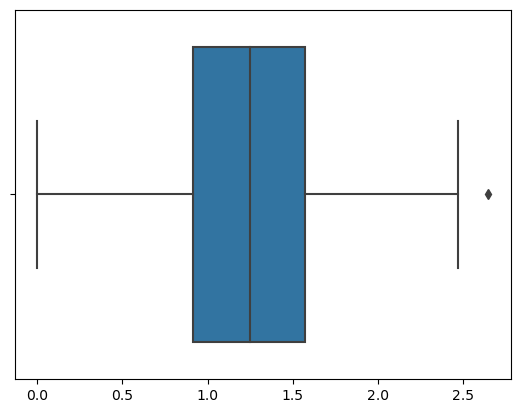

In [18]:
sns.boxplot(benin)

In [19]:
lower_limit_benin = np.quantile(benin,0.04)
print(lower_limit_benin)
upper_limit_benin = np.quantile(benin,0.96)
print(upper_limit_benin)

0.7
2.4339999999999997


In [20]:
benin[(benin < lower_limit_benin) | (benin > upper_limit_benin)]

array([6.90e-01, 8.20e-06, 2.65e+00, 2.47e+00])

In [21]:
benin_filtered_outlier = benin[(benin > lower_limit_benin) & (benin < upper_limit_benin)]
benin_mean = round(benin_filtered_outlier.mean(),2)
print("mean value to replace outliers - ",round(benin_mean,2))

mean value to replace outliers -  1.3


In [22]:
outlier_benin = (np.where(benin > upper_limit_benin, benin_mean, 
                          np.where(benin < lower_limit_benin, benin_mean, benin)))
pd.DataFrame(outlier_benin)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.49,1.51,1.41,1.36,1.25,1.18,1.1,1.02,0.94,0.85,...,1.3,2.29,2.13,2.01,1.83,1.64,1.47,1.47,1.58,1.57


Text(0.5, 1.0, 'After removing outliers')

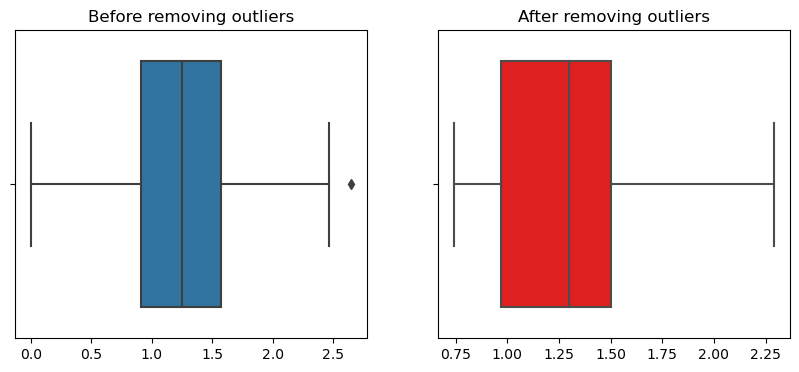

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.boxplot(benin)
plt.title("Before removing outliers")
plt.subplot(122)
sns.boxplot(outlier_benin, color = 'r')
plt.title("After removing outliers")

In [24]:
df.at[(14,'2011')] = '1.32'
df.at[(14,'2005')] = '1.32'
df.at[(14,'2012')] = '1.32'
df.at[(14,'2002')] = '1.32'

## Bahrain

In [25]:
df[df['Country Name'] == 'Bahrain']

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
18,Bahrain,BHR,1.01,1.05,1.01,1.11,1.08,1.08,1.09,1.08,...,1.2,1.18,1.19,1.2,1.19,1.18,1.2,1.2,1.78,1.87


In [26]:
bahrain = df[df['Country Name'] == 'Bahrain']
bahrain = bahrain.iloc[:,2:].values
bahrain

array([[1.01, 1.05, 1.01, 1.11, 1.08, 1.08, 1.09, 1.08, 1.09, 1.08,
        111.2, 1.11, 1.09, 1.09, 1.09, 0.00011, 1.09, 1.11, 1.14, 1.13,
        1.18, 1.2, 1.18, 1.19, 1.2, 1.19, 1.18, 1.2, 1.2, 1.78, 1.87]],
      dtype=object)

<AxesSubplot:>

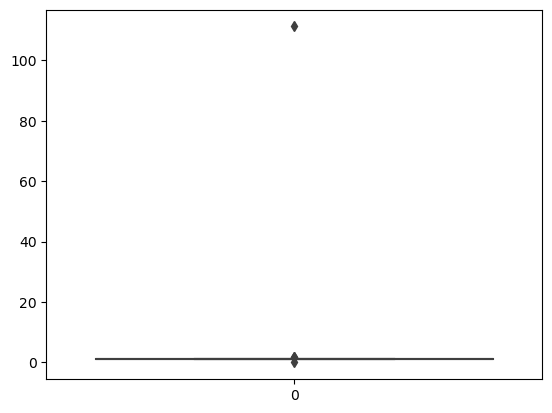

In [27]:
sns.boxplot(data = bahrain)

In [28]:
lower_limit_bahrain = np.quantile(bahrain,0.07)
print(lower_limit_benin)
upper_limit_bahrain = np.quantile(bahrain,0.93)
print(upper_limit_benin)

0.7
2.4339999999999997


In [29]:
bahrain[(bahrain < lower_limit_bahrain) | (bahrain > upper_limit_bahrain)]

array([1.01, 1.01, 111.2, 0.00011, 1.78, 1.87], dtype=object)

In [30]:
bahrain_filtered_outlier = bahrain[(bahrain > lower_limit_bahrain) & (bahrain < upper_limit_bahrain)]
bahrain_mean = round(bahrain_filtered_outlier.mean(),2)
print("mean value to replace outliers - ", round(bahrain_mean,2))

mean value to replace outliers -  1.13


In [31]:
outlier_bahrain = np.where(bahrain > upper_limit_bahrain, bahrain_mean,
                            np.where(bahrain < lower_limit_bahrain, bahrain_mean, bahrain))
pd.DataFrame(outlier_bahrain)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.13,1.05,1.13,1.11,1.08,1.08,1.09,1.08,1.09,1.08,...,1.2,1.18,1.19,1.2,1.19,1.18,1.2,1.2,1.13,1.13


Text(0.5, 1.0, 'After removing outliers')

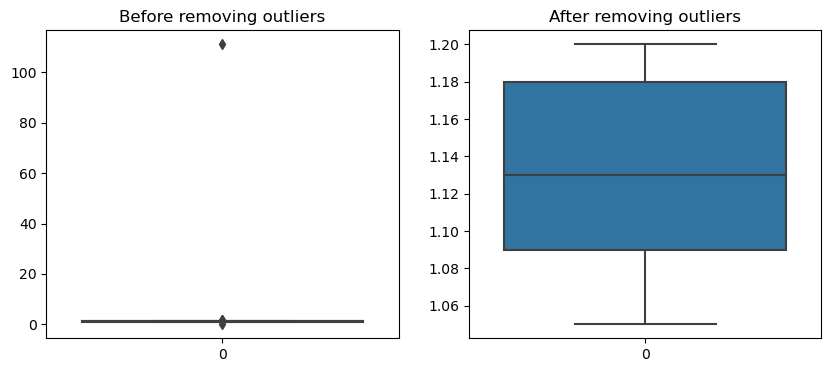

In [32]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.boxplot(data = bahrain)
plt.title("Before removing outliers")
plt.subplot(122)
sns.boxplot(data = outlier_bahrain)
plt.title("After removing outliers")

In [33]:
df.at[18,'2001'] = '1.13'
df.at[18,'2006'] = '1.13'

## Creating new column

In [34]:
new = ([1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,
             2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,
             2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021] * 235)

In [35]:
country_name=df['Country Name'].squeeze(axis=0) 
country_name=country_name.repeat(31)

In [36]:
country_code=df['Country Code'].squeeze()
country_code=country_code.repeat(31)

In [37]:
new_df= pd.DataFrame()
new_df['Country_name'] = country_name
new_df['Country_code'] = country_code
new_df['Year'] = new
new_df

,Country_name,Country_code,Year
0,Africa Eastern and Southern,AFE,1991
0,Africa Eastern and Southern,AFE,1992
0,Africa Eastern and Southern,AFE,1993
0,Africa Eastern and Southern,AFE,1994
0,Africa Eastern and Southern,AFE,1995
...,...,...,...
234,Zimbabwe,ZWE,2017
234,Zimbabwe,ZWE,2018
234,Zimbabwe,ZWE,2019
234,Zimbabwe,ZWE,2020


In [38]:
a = df.iloc[:,2:].T
a.head(2)

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
1991,7.8,10.65,4.42,4.21,10.31,11.62,1.87,5.44,1.6,9.58,...,9.45,12.35,2.09,1.68,4.8,2.1,8.32,29.95,18.9,4.94
1992,7.84,10.82,4.53,4.21,30.01,12.12,1.84,6.36,1.8,10.73,...,7.69,12.51,1.91,1.69,4.96,2.38,8.31,29.98,19.37,4.99


In [39]:
emp = [j for i in range(235) for j in a[i]]
emp

[7.8,
 7.84,
 7.85,
 7.84,
 7.83,
 7.84,
 7.86,
 7.81,
 7.79,
 7.72,
 7.73,
 7.96,
 7.79,
 7.31,
 7.12,
 6.99,
 6.74,
 6.27,
 6.32,
 6.87,
 6.75,
 6.56,
 6.45,
 6.41,
 6.49,
 6.61,
 6.71,
 6.73,
 6.91,
 7.56,
 8.11,
 10.65,
 10.82,
 10.72,
 10.73,
 11.18,
 10.96,
 10.78,
 10.8,
 10.81,
 10.81,
 10.81,
 11.26,
 11.14,
 10.99,
 11.22,
 11.1,
 11.3,
 11.09,
 11.31,
 11.35,
 11.05,
 11.34,
 11.19,
 11.14,
 11.13,
 11.16,
 11.18,
 11.15,
 11.22,
 11.71,
 13.28,
 4.42,
 4.53,
 4.55,
 4.54,
 4.53,
 4.57,
 4.6,
 4.66,
 4.86,
 4.92,
 4.87,
 4.78,
 4.75,
 4.73,
 4.73,
 4.65,
 4.63,
 4.6,
 4.58,
 4.55,
 4.55,
 4.64,
 4.41,
 4.69,
 4.63,
 5.57,
 6.02,
 6.04,
 6.06,
 6.77,
 6.84,
 4.21,
 4.21,
 4.23,
 4.16,
 4.11,
 4.1,
 4.09,
 4.07,
 4.05,
 4.03,
 4.0,
 3.96,
 3.96,
 3.92,
 3.88,
 3.86,
 3.82,
 3.79,
 3.78,
 9.43,
 7.36,
 7.35,
 7.37,
 7.37,
 7.39,
 7.41,
 7.41,
 7.42,
 7.42,
 8.33,
 8.53,
 10.31,
 30.01,
 25.26,
 20.84,
 14.61,
 13.93,
 16.88,
 20.05,
 20.84,
 19.03,
 18.58,
 17.9,
 16.99,
 16.31

In [40]:
new_df['No_of_unemployed'] = emp
new_df

,Country_name,Country_code,Year,No_of_unemployed
0,Africa Eastern and Southern,AFE,1991,7.8
0,Africa Eastern and Southern,AFE,1992,7.84
0,Africa Eastern and Southern,AFE,1993,7.85
0,Africa Eastern and Southern,AFE,1994,7.84
0,Africa Eastern and Southern,AFE,1995,7.83
...,...,...,...,...
234,Zimbabwe,ZWE,2017,4.78
234,Zimbabwe,ZWE,2018,4.8
234,Zimbabwe,ZWE,2019,4.83
234,Zimbabwe,ZWE,2020,5.35


# Write a function called descriptive_stats(country_code) which would - 

In [41]:
def descriptive_stats(country_code):
    country_df = new_df[new_df['Country_code'] == country_code]
    
    new_df['No_of_unemployed']=pd.to_numeric(new_df['No_of_unemployed'])
    country_df['No_of_unemployed'] = pd.to_numeric(country_df['No_of_unemployed'], errors='coerce')
    country_df.dropna(subset=['No_of_unemployed'], inplace=True)

    mean = country_df['No_of_unemployed'].mean()
    median = country_df['No_of_unemployed'].median()
    mode = country_df['No_of_unemployed'].mode()[0]
    std_dev = country_df['No_of_unemployed'].std()

    min_year = (country_df['No_of_unemployed'].min())
    min_year = country_df[country_df['No_of_unemployed'] == min_year]['Year']
    max_year = (country_df['No_of_unemployed'].max())
    max_year = country_df[country_df['No_of_unemployed'] == max_year]['Year']

    top_5_countries = new_df[new_df['Year'] == 2021].sort_values(by='No_of_unemployed', 
                                                                 ascending=False)['Country_code'].head(5).tolist()

    top_3_countries = new_df[(new_df['Year'] == 2021) & 
                             (new_df['No_of_unemployed'] < 5)].sort_values(by='Year', 
                                                                           ascending=False)['Country_code'].head(3).tolist()
  
    top_5_changes = {}
    for country in top_5_countries:
        country_df = new_df[new_df['Country_code'] == country]
        start_year = country_df.loc[country_df['Year'] == 1991, 'No_of_unemployed'].iloc[0]
        end_year = country_df.loc[country_df['Year'] == 2021, 'No_of_unemployed'].iloc[0]
        change = ((end_year - start_year) / start_year) * 100
        top_5_changes[country] = change
    
    return {
        'mean': mean,
        'median': median,
        'mode': mode,  
        'std_dev': std_dev,  
        'min_year': min_year,
        'max_year': max_year,
        'top_5_countries': top_5_countries,
        'top_3_countries': top_3_countries,
        'top_5_changes': top_5_changes
    }

In [42]:
descriptive_stats("AFG")

{'mean': 11.141290322580646,
 'median': 11.14,
 'mode': 10.81,
 'std_dev': 0.4619721631980571,
 'min_year': 1    1991
 Name: Year, dtype: int64,
 'max_year': 1    2021
 Name: Year, dtype: int64,
 'top_5_countries': ['ZAF', 'DJI', 'SWZ', 'PSE', 'BWA'],
 'top_3_countries': ['ARE', 'PSS', 'MMR'],
 'top_5_changes': {'ZAF': 12.053422370617707,
  'DJI': -3.303814713896454,
  'SWZ': 18.110958276020188,
  'PSE': 114.65517241379311,
  'BWA': 78.87120115774239}}

In [43]:
bgr_df = new_df[new_df['Country_code'] == 'BGR']
min_unemployment = bgr_df.sort_values(by='No_of_unemployed', ascending=True).iloc[0]
min_year = min_unemployment['Year']
min_year

2019

# Percentage change in Unemployment

In [44]:
country_names = new_df[['Country_code', 'Country_name']].drop_duplicates()
country_names['Percentage_change'] = ((new_df[new_df['Year'] == 2021]['No_of_unemployed'] - new_df[new_df['Year'] == 1991]
                                       ['No_of_unemployed']) / new_df[new_df['Year'] == 1991]['No_of_unemployed']) * 100

columns_names = pd.DataFrame(country_names)
columns_names

,Country_code,Country_name,Percentage_change
0,AFE,Africa Eastern and Southern,3.974359
1,AFG,Afghanistan,24.694836
2,AFW,Africa Western and Central,54.751131
3,AGO,Angola,102.612827
4,ALB,Albania,14.645975
...,...,...,...
230,WSM,Samoa,368.571429
231,YEM,"Yemen, Rep.",63.100962
232,ZAF,South Africa,12.053422
233,ZMB,Zambia,-31.058201


# Analysing Particular Country Unemployment

In [45]:
japan_df = new_df[new_df['Country_code'] == 'JPN']
min_unemployment = japan_df.sort_values(by='No_of_unemployed', ascending=True).iloc[0]
min_year = min_unemployment['Year']

prev_year_unemployment = japan_df[japan_df['Year'] == min_year - 1]['No_of_unemployed']
next_year_unemployment = japan_df[japan_df['Year'] == min_year + 1]['No_of_unemployed']

if not prev_year_unemployment.empty:
    prev_year_unemployment = prev_year_unemployment.values[0]
else:
    prev_year_unemployment = None

if not next_year_unemployment.empty:
    next_year_unemployment = next_year_unemployment.values[0]
else:
    next_year_unemployment = None
    
print(f"Minimum unemployment year for Japan: {min_year}")
print(f"Unemployment in the previous year: {prev_year_unemployment}")
print(f"Unemployment in the next year: {next_year_unemployment}")


Minimum unemployment year for Japan: 1991
Unemployment in the previous year: None
Unemployment in the next year: 2.2


In [46]:
country_codes = ['MDA', 'NAC', 'PAN', 'PAK', 'UGA']
country_df = new_df[new_df['Country_code'].isin(country_codes)]
country_df['Unemployment_difference'] = country_df[country_df['Year'] == 2021]['No_of_unemployed'] 
- country_df[country_df['Year'] == 2019]['No_of_unemployed']

upward = country_df.sort_values(by='Unemployment_difference', ascending=False).head(1)['Country_code'].values[0]
downward = country_df.sort_values(by='Unemployment_difference', ascending=True).head(1)['Country_code'].values[0]

print("upward  - ",upward)
print("downward  -",downward)

upward  -  PAN
downward  - UGA


# percentage change in unemployment

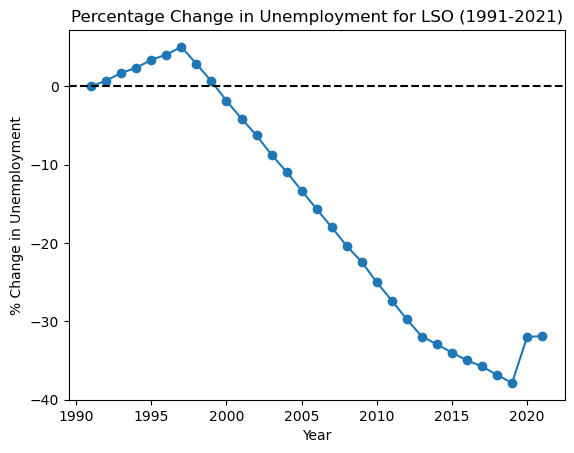

The percentage change in unemployment for LSO from 1991 to 2021 is -31.89%


In [47]:
import matplotlib.pyplot as plt

# Filter the data for country 'LSO'
lso_df = new_df[new_df['Country_code'] == 'LSO']

# Calculate the percentage change in unemployment from 1991 to 2021
start_year = lso_df[lso_df['Year'] == 1991]['No_of_unemployed'].values[0]
end_year = lso_df[lso_df['Year'] == 2021]['No_of_unemployed'].values[0]
percentage_change = ((end_year - start_year) / start_year) * 100

# Plot the line graph
plt.plot(lso_df['Year'], (lso_df['No_of_unemployed'] - start_year) / start_year * 100, marker='o')
plt.title('Percentage Change in Unemployment for LSO (1991-2021)')
plt.xlabel('Year')
plt.ylabel('% Change in Unemployment')
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.show()

print(f"The percentage change in unemployment for LSO from 1991 to 2021 is {percentage_change:.2f}%")


# Part 4 - Analysing with Filtering 

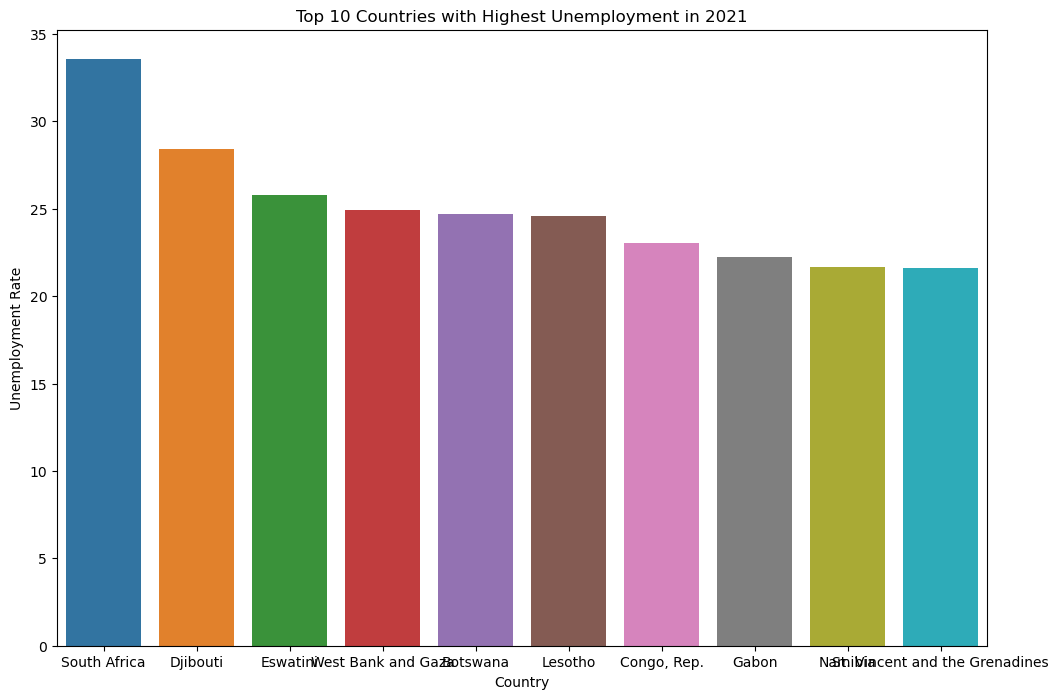

In [48]:
top_10_unemp_2021 = new_df[new_df['Year']==2021].sort_values(by='No_of_unemployed', ascending=False).head(10)
plt.figure(figsize=(12,8))
sns.barplot(data=top_10_unemp_2021, x='Country_name', y='No_of_unemployed')
plt.title('Top 10 Countries with Highest Unemployment in 2021')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate')
plt.show()

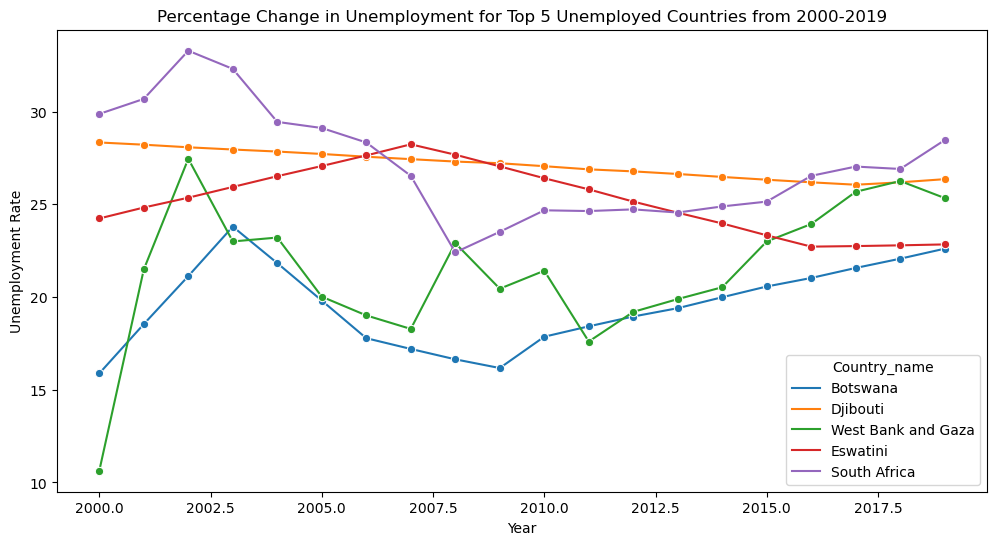

In [49]:
top_5_unemp_2021 = top_10_unemp_2021.head(5)
top_5_unemp_2021_years = new_df[new_df['Country_name'].isin(top_5_unemp_2021['Country_name'].tolist()) 
                                & (new_df['Year']>=2000) & (new_df['Year']<=2019)]
top_5_unemp_2021_years = top_5_unemp_2021_years.reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data = top_5_unemp_2021_years, x='Year', y='No_of_unemployed', hue='Country_name', marker='o')
plt.title('Percentage Change in Unemployment for Top 5 Unemployed Countries from 2000-2019')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()

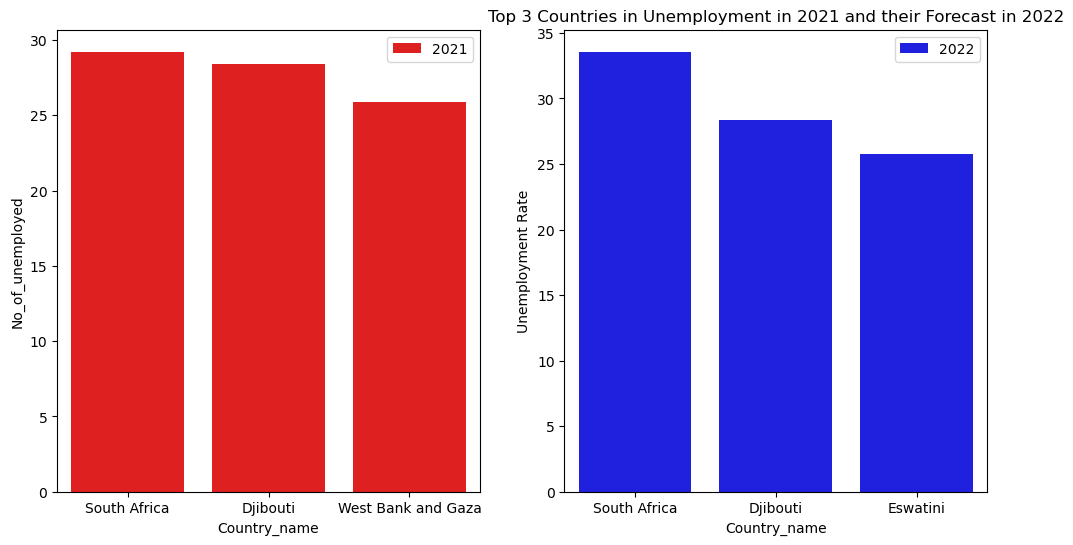

In [50]:
top_3_unemp_2021 = new_df[new_df['Year']==2020].sort_values(by='No_of_unemployed', ascending=False).head(3)
top_3_unemp_2022 = new_df[new_df['Year']==2021].sort_values(by='No_of_unemployed', ascending=False).head(3)
plt.figure(figsize=(12,6))
plt.title('Top 3 Countries in Unemployment in 2021 and their Forecast in 2022')
plt.subplot(121)
sns.barplot(data=top_3_unemp_2021, x='Country_name', y='No_of_unemployed', color='r', label='2021')
plt.legend()
plt.subplot(122)
sns.barplot(data=top_3_unemp_2022, x='Country_name', y='No_of_unemployed', color='blue', label='2022')
plt.title('Top 3 Countries in Unemployment in 2021 and their Forecast in 2022')
plt.xlabel('Country_name')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

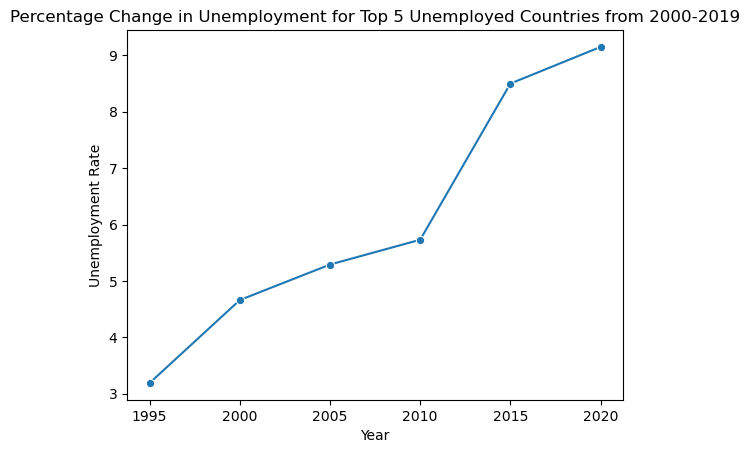

In [51]:
wsm_data = new_df[new_df['Country_code']=='WSM']
wsm_data_5yr = wsm_data[wsm_data['Year']%5==0]
df_wsm = wsm_data_5yr.reset_index()
sns.lineplot(data = df_wsm, x='Year', y='No_of_unemployed',marker='o')
plt.title('Percentage Change in Unemployment for Top 5 Unemployed Countries from 2000-2019')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()